# Parse Json

In [1]:
def parseRaw(json_map):
    url = json_map['url']
    content = json_map['html']
    return (url,content)

# 載入原始 RAW Data

In [2]:
import json
import pprint
pp = pprint.PrettyPrinter(indent=2)
path = "./raingod.txt"
all_content = sc.textFile(path).map(json.loads).map(parseRaw)

# 使用 BeautifulSoup 及 Jieba 來處理文章內容

In [19]:
def getContent(x):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(x)
    mydivs = soup.findAll("div", { "class" : "article-content" })[0]
    
    text = mydivs.getText().replace('\n','').replace('\r','').replace(' ','').replace('\t','')
    import jieba
    import jieba.posseg as pseg
    r = list()
    

    for term in pseg.cut(text):
        if len(term.word) > 1 and checkword(term.word ) and 'n' in term.flag : 
            r.append(term.word)
    return r
def checkword(x):
    return all(u'\u4e00' <= c <= u'\u9fff' for c in x)

# 印出第一筆資料

In [20]:
parsed = all_content.mapValues(lambda x : getContent(x))
print 'url:',parsed.first()[0]
print 'term:',
for term in parsed.first()[1][:10] :
    print term , 

url: http://raindog.pixnet.net/blog/post/25339122-%e5%ae%89%e5%bf%83%e4%ba%9e-%e2%94%80-%e5%85%a8%e5%8f%b0%e9%a6%96%e4%bd%8d%e5%85%ac%e9%96%8b%e7%a9%bfc%e5%ad%97%e8%a4%b2%e7%9a%84%e5%a5%b3%e8%97%9d%e4%ba%ba

term: 本名 廖婧 伶的 公分 體重 三圍 公分 演藝圈 啤酒 廣告


# 請完成以下程碼來計算 Global 詞頻，並取出前 10 個最常出現的詞

In [21]:
parsed.map(lambda x: x[1]).flatMap(lambda x : x).take(10)

[u'\u672c\u540d',
 u'\u5ed6\u5a67',
 u'\u4f36\u7684',
 u'\u516c\u5206',
 u'\u9ad4\u91cd',
 u'\u4e09\u570d',
 u'\u516c\u5206',
 u'\u6f14\u85dd\u5708',
 u'\u5564\u9152',
 u'\u5ee3\u544a']

In [22]:
from operator import add
top_term = parsed.map(
    lambda x: x[1]).flatMap(
    lambda x : x).map(
    lambda x: (x,1)).reduceByKey(
    add).sortBy(
    lambda x: x[1],ascending=False)
for term in top_term.take(10):
    print term[0] , term[1]

日本 801
文章 629
台灣 458
網友 352
照片 274
影片 271
時候 244
性感 230
女星 210
廣告 191


# 加碼如可產生 WordCloud

In [23]:
%matplotlib inline


In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS



In [25]:
no_urls_no_tags  = " ".join(top_term.map(lambda x : x[0]).take(30))
wordcloud = WordCloud(
                      font_path='./cwTeXQFangsong-Medium.ttf',
                      background_color='white',
                      width=600,
                      height=600
                     )
wordcloud.fit_words(top_term.take(300))

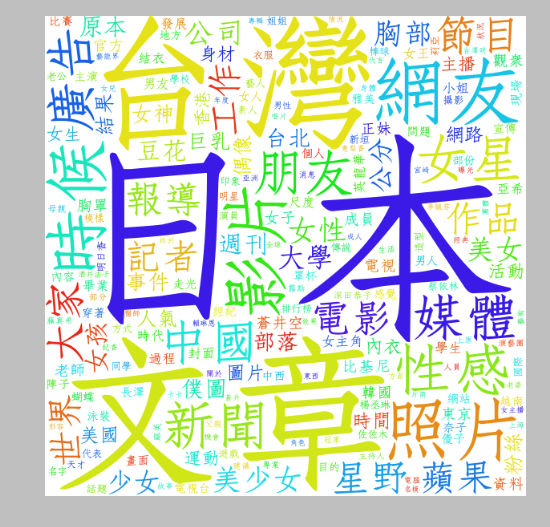

In [26]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Load Word2Vec

In [2]:
from gensim.models import Word2Vec
wmodels = Word2Vec.load('../data/word2vec.model')

In [13]:
m= ['日本','星野']

f = open('./google-word2vec-visual/data/word2vec.csv','w')
f.write('name,value\r\n')
for i in wmodels.most_similar(positive=m,topn=40):
    print i[0],i[1]
    f.write(str(i[0]) + " " + str(i[1]) + "\r\n")
f.close()

長野 0.791186869144
木縣 0.773466944695
群馬 0.771468520164
之秋楓 0.768889248371
全日本 0.766780614853
新穂 0.760086596012
輕井澤 0.758339941502
三大名 0.752006530762
草津溫泉住宿 0.751321732998
歧阜縣 0.750974535942
瘋夏日 0.747054219246
20101219 0.743543446064
新瀉 0.738581240177
東北地區 0.737034440041
岐阜 0.732240140438
草津 0.731588721275
20110107 0.73115336895
三大裸 0.729279458523
縣及 0.7285374403
信州 0.728446722031
祭之起 0.725200772285
伊豆 0.722519159317
飛驒古川 0.722478091717
那須高原 0.722179412842
房初 0.721590161324
RASSE 0.720975160599
sCabin 0.720147609711
新潟 0.717641890049
縣橫 0.716195821762
清水港駿 0.71562308073
三大景 0.71537065506
kumobaike 0.71202903986
那須 0.711572349072
町長 0.710412561893
靜岡 0.710333526134
青森屋 0.710147738457
縣名 0.708785891533
城之一 0.708053588867
如日光 0.70782905817
源鳟 0.707139909267
